In [50]:
import pandas as pd

import pandas as pd

from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import joblib
from pathlib import Path
import time

In [51]:
df = pd.read_csv('../data/internet_service_churn_scaled.csv')

In [52]:
df.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,reamining_contract,download_avg,upload_avg,download_over_limit,churn
0,0.476083,-0.708273,4.684387,-0.537157,-0.556575,-0.192699,-0.208788,0.0
1,-2.100476,-0.708273,2.844086,-0.747446,-0.689055,-0.426943,-0.208788,1.0
2,0.476083,-0.708273,3.184517,-0.747446,-0.472986,-0.335282,-0.208788,1.0
3,-2.100476,-0.708273,2.178025,-0.747446,-0.689055,-0.426943,-0.208788,1.0
4,-2.100476,-0.708273,1.941204,-0.747446,-0.689055,-0.426943,-0.208788,1.0


In [53]:
df_X = df.drop(['churn'], axis=1)
df_y = df['churn']

In [54]:
from sklearn.model_selection import train_test_split

_, X_test, _, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

In [55]:


dir = '../models/'
list_of_models = os.listdir(dir)

sizes = []
times_of_exec = []
metrics = []
for model_file in list_of_models:
    path = dir + model_file
    model_name = Path(path).stem
    size = os.path.getsize(path)
    print(path)
    model = joblib.load(path)
    sizes.append([model_name, size/1024])

    start_time = time.time()
    y_pred = model.predict(X_test)
    times_of_exec.append([model_name, time.time() - start_time])
    metrics.append([model_name, precision_recall_curve(y_test, y_pred)])

../models/decision_tree.pkl
../models/logistic_regression_model.pkl
../models/neural_model_MLP.pkl
../models/svm_model_by_pipeline.pkl
../models/svm_model_linear.pkl
../models/svm_model_poly.pkl
../models/svm_model_rbf.pkl
../models/svm_model_sigmoid.pkl


In [56]:
sizes

[['decision_tree', 2.5048828125],
 ['logistic_regression_model', 0.9404296875],
 ['neural_model_MLP', 280.1953125],
 ['svm_model_by_pipeline', 854.056640625],
 ['svm_model_linear', 1390.0888671875],
 ['svm_model_poly', 1177.0107421875],
 ['svm_model_rbf', 959.6201171875],
 ['svm_model_sigmoid', 884.9638671875]]

In [57]:
times_of_exec

[['decision_tree', 0.004009723663330078],
 ['logistic_regression_model', 0.003009319305419922],
 ['neural_model_MLP', 0.1734626293182373],
 ['svm_model_by_pipeline', 22.2647442817688],
 ['svm_model_linear', 7.890460968017578],
 ['svm_model_poly', 7.713992595672607],
 ['svm_model_rbf', 23.65198540687561],
 ['svm_model_sigmoid', 9.091187477111816]]

In [58]:
metrics

[['decision_tree',
  (array([0.5632882 , 0.94963186, 1.        ]),
   array([1.        , 0.93423327, 0.        ]),
   array([0., 1.]))],
 ['logistic_regression_model',
  (array([0.5632882, 0.8644813, 1.       ]),
   array([1.        , 0.92254507, 0.        ]),
   array([0., 1.]))],
 ['neural_model_MLP',
  (array([0.5632882 , 0.95301786, 1.        ]),
   array([1.        , 0.92666063, 0.        ]),
   array([0., 1.]))],
 ['svm_model_by_pipeline',
  (array([0.5632882 , 0.91260722, 1.        ]),
   array([1.        , 0.92830686, 0.        ]),
   array([0., 1.]))],
 ['svm_model_linear',
  (array([0.5632882 , 0.85424242, 1.        ]),
   array([1.        , 0.92814223, 0.        ]),
   array([0., 1.]))],
 ['svm_model_poly',
  (array([0.5632882 , 0.89124941, 1.        ]),
   array([1.        , 0.92888304, 0.        ]),
   array([0., 1.]))],
 ['svm_model_rbf',
  (array([0.5632882 , 0.91366324, 1.        ]),
   array([1.        , 0.92855379, 0.        ]),
   array([0., 1.]))],
 ['svm_model_sigm

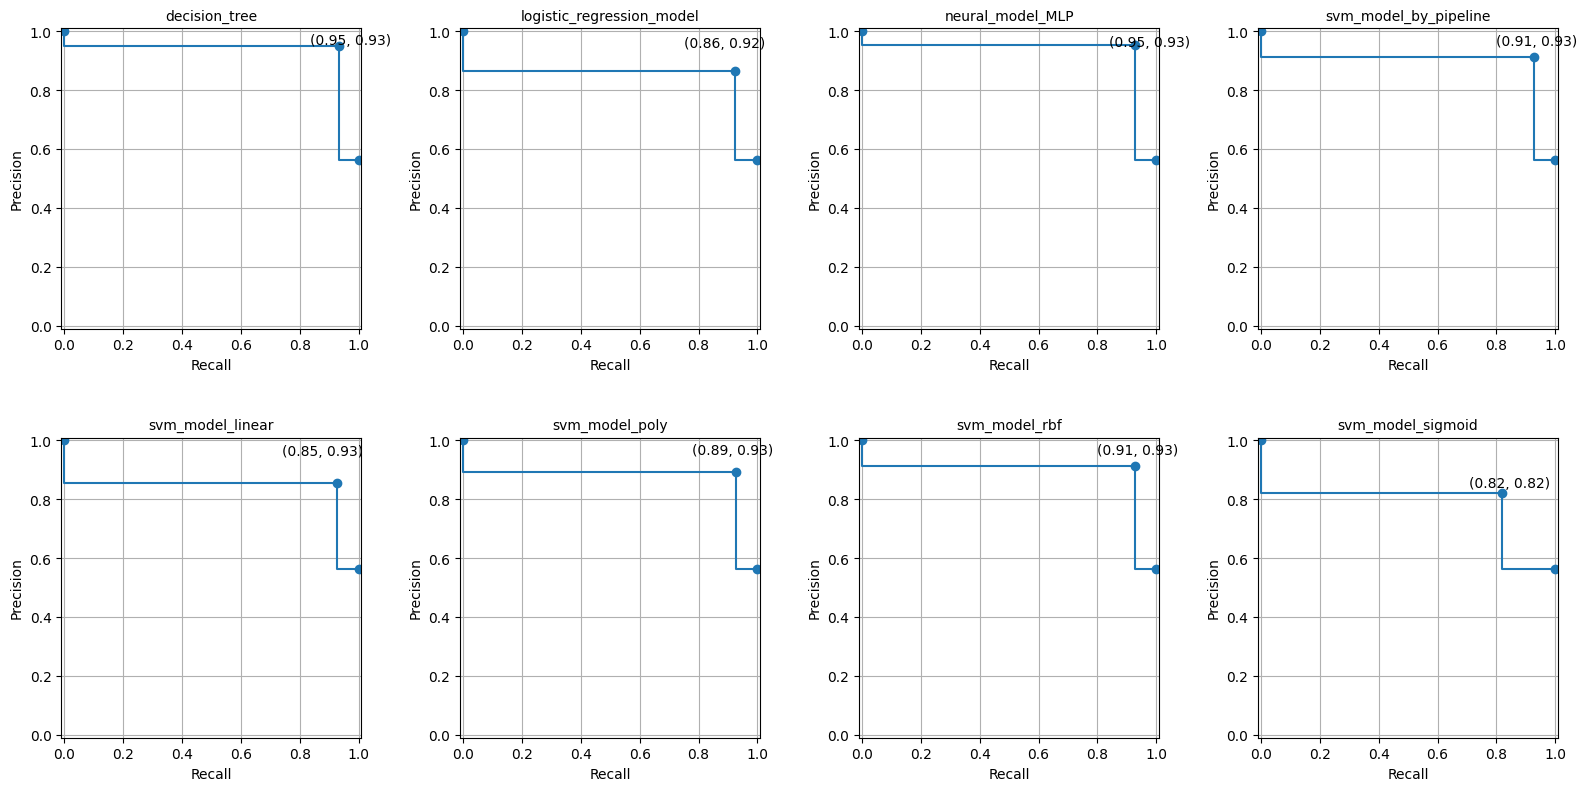

In [59]:
import matplotlib.pyplot as plt

length = len(metrics)
fig, axs = plt.subplots(3, 4)  # Створення сітки 3x4
fig.set_figwidth(16)
fig.set_figheight(12)  # Висота для кращого відображення

for i in range(length):
    name, (precis, recall, _) = metrics[i]
    disp = PrecisionRecallDisplay(precision=precis, recall=recall)
    row = i // 4  # Рядок
    col = i % 4   # Стовпець
    ax = axs[row, col]
    ax.grid()
    ax.annotate(text=f'({precis[1]:.2f}, {recall[1]:.2f})', xy=(precis[1], recall[1]), textcoords='offset points', xytext=(5,5), ha='center')
    ax.set_title(name, size=10)
    disp.plot(ax=ax, marker='o')

# Видалення зайвих підграфіків (якщо необхідно)
if length < 12:
    for j in range(length, 12):
        fig.delaxes(axs[j // 4, j % 4])

plt.tight_layout()
plt.show()


### Графік Precision-Recall
**X-вісь:** показує значення повноти (Recall).

**Y-вісь:** показує значення точності (Precision).

На графіку відображається залежність між точністю та повнотою при різних порогах прийняття рішень класифікаційної моделі.

### Інтерпретація
**Висока точність при низькій повноті:** означає, що модель робить мало помилкових позитивних передбачень, але також може пропустити багато справжніх позитивних випадків.

**Висока повнота при низькій точності:** модель знаходить майже всі справжні позитивні випадки, але робить багато помилкових позитивних передбачень.

### У висновку
Висока точність (біля 1.0) та висока повнота (біля 1.0) демонструють, що модель добре виявляє позитивні випадки і при цьому має низький рівень помилкових позитивних результатів.
Графіки показують, що на рівні високої повноти точність також залишається високою.

**Наприклад:** `logistic_regression_model` показала меншу точність 0.86 при повноті 0.92 (довга вертикальна лінія на графіку), що в порівнянні з моделями `decision_tree`, `neural_model_MLP` які показали точніть 0.95 при повноті 0.93.


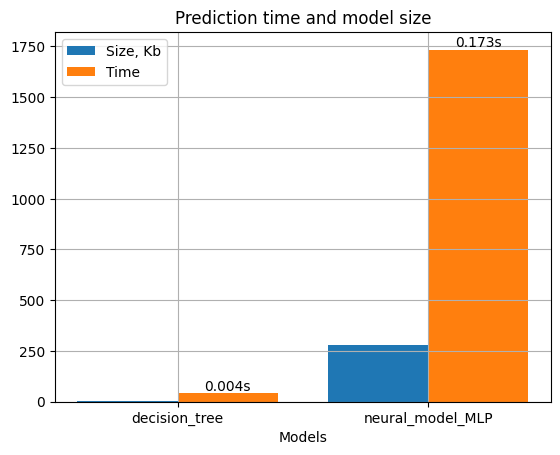

In [60]:
import numpy as np

# побудувати графік тільки тих моделей, які показали кращий результат Decision-Recall
includes = [
    'decision_tree',
    'neural_model_MLP'
]

labels = [s[0] for s in sizes if s[0] in includes]
size = [s[1] for s in sizes if s[0] in includes]
t_sec = [t[1] for t in times_of_exec if t[0] in includes]
# значення настільки малі, тому для наглядності висота стовпчиків 
# синтетично збільшена, але значення реальні
t_pseudo = [t * 10000 for t in t_sec]
time_bar_labels = [f'{t:.3f}s' for t in t_sec]

X_axis = np.arange(len(labels))
fig, ax = plt.subplots()

size_bar = plt.bar(X_axis - 0.2, size, 0.4, label = 'Size, Kb')
time_bar = ax.bar(X_axis + 0.2, t_pseudo, 0.4, label = 'Time')
ax.bar_label(time_bar, labels=time_bar_labels)



plt.xticks(X_axis, labels) 
plt.xlabel("Models") 
plt.title("Prediction time and model size") 
plt.grid()
plt.legend()
plt.show()

### У висновку
маємо одну модель `decision_tree`, яка швидше виконується, менше важить і має кращі показники Decision-Recall 🍺🍺🍺🍺